In [1]:
## Gerekli kütüphanelerin tanımlanması
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, normalize
from matplotlib import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
import seaborn as sn

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard

In [2]:
## Verisetini okuma
heart_data = pd.read_csv ('heart.csv')

In [3]:
## data kontrolü için datanın ilk beş satırının çekilmesi
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
## Verisetini X ve Y olarak ayırma
X=heart_data.drop('HeartDisease',axis=1) 
y=heart_data['HeartDisease']

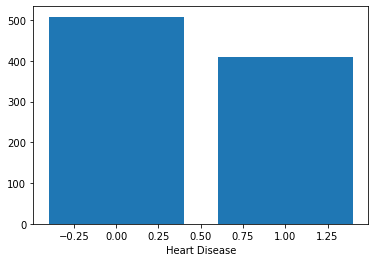

In [5]:
## Ayrılan X ve Y yi grafikle gösterme
star_clas = y.unique()
values = y.value_counts()

plt.bar(star_clas, values)
plt.xlabel("Heart Disease" )
plt.show()

In [6]:
## Verisetindeki Harfleri Sayıya Çevirme
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [7]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1
914,40,1,0,45,51,1,1,67,0,42,1
915,29,1,0,31,9,0,1,41,1,22,1
916,29,0,1,31,94,0,0,100,0,10,1


In [8]:
## X'in MinMax ile Ölçeklendirilmesi
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

In [9]:
scaler.data_max_

array([ 49.,   1.,   3.,  66., 221.,   1.,   2., 118.,   1.,  52.,   2.])

In [10]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
Y=enc.fit_transform(y[:,np.newaxis]).toarray()

In [11]:
Y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [12]:
X.shape

(918, 11)

In [13]:
n_feat = X.shape[1]
n_class= Y.shape[1]

In [14]:
## Veri Setinin %30'u Test, %70'ı Train için Ayrılmıştır
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.30)
X_test, X_val, y_test,y_val = train_test_split(X_test, y_test, test_size = 0.40)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(642, 11)
(165, 11)
(111, 11)


In [16]:
## Model Oluşturma
def x_model(name, hidden_l,op):
  model = Sequential(name = name )
  model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
  for a in range(hidden_l):
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(n_class, kernel_initializer = 'uniform', activation = 'softmax'))
  model.compile(optimizer = op, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [17]:
n_class

2

In [18]:
## Oluşturulan Modelin Eğitilmesi
def run(name,hidden_l,op):
    batch_s=12
    epochs=100
    model=x_model(name,hidden_l,op)
    t_history = model.fit(X_train, y_train, batch_size=batch_s, epochs=epochs, verbose=0, validation_data=(X_val, y_val))
    
    return t_history , model

In [19]:
## Çıkan Sonuçları Grafikte Gösterme
def plt_history(history,model_name):
    fig, (cx1, cx2) = plt.subplots(2, figsize=(8, 6))

    cx1.plot(history.history['loss'])
    cx1.plot(history.history['val_loss'])


    cx2.plot(history.history['accuracy'])
    cx2.plot(history.history['val_accuracy'])

    
    cx1.set_ylabel('loss')
    cx1.legend(['train', 'test'], loc='upper left')

    cx2.set_ylabel('accuracy')
    cx2.set_xlabel('epoch')
    cx1.legend(['Training', 'Validation'], loc='upper left')
    plt.savefig(model_name+'_los_acc')

In [20]:
Y_test = np.argmax(y_test, axis=1)

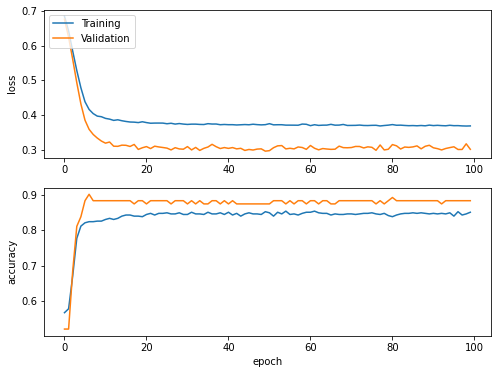

In [23]:
##LEARNING RATE DEĞİŞTİRME(HIDDEN LAYER SABIT) -- DENEME 1
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.001)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred = np.argmax(y_pred, axis=1)

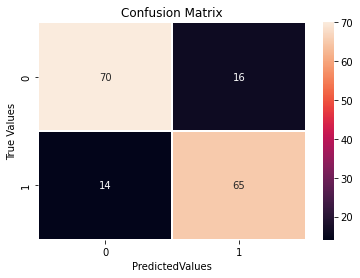

In [26]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

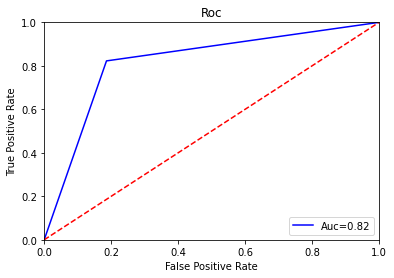

In [27]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

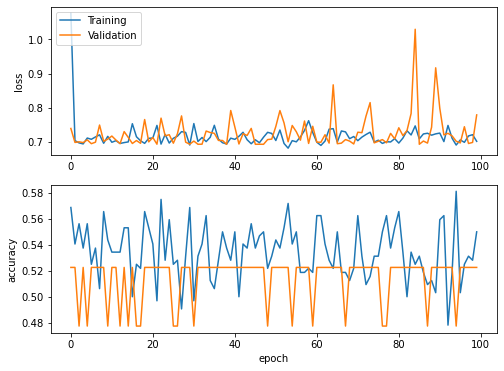

In [29]:
## Deneme2
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.5)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred = np.argmax(y_pred, axis=1)

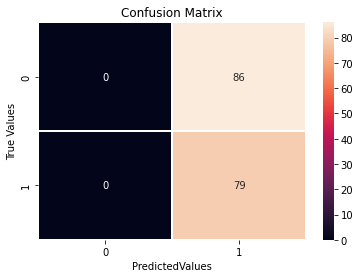

In [32]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

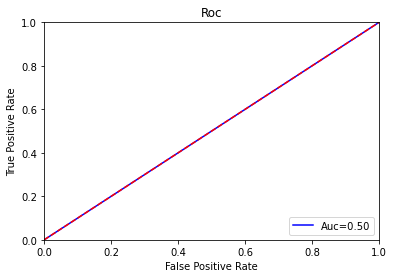

In [33]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

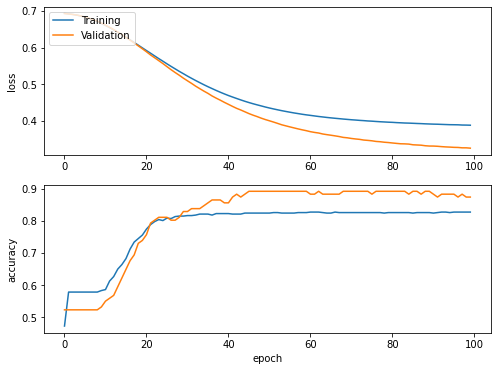

In [35]:
## Deneme3
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred = np.argmax(y_pred, axis=1)

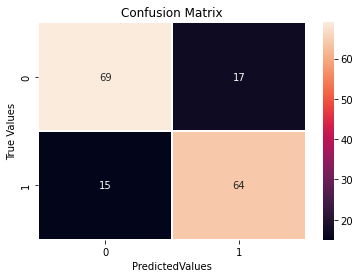

In [38]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

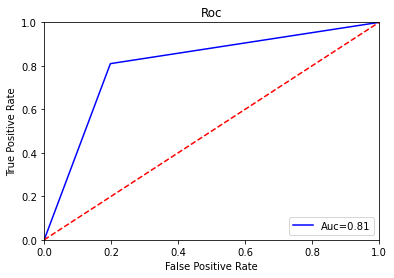

In [39]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

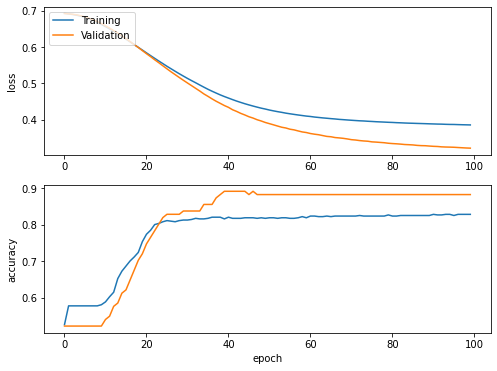

In [41]:
##HİDDEN LAYER DEĞİŞTİRME (LEARNING RATE SABİT)
## DENEME 1
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred = np.argmax(y_pred, axis=1)

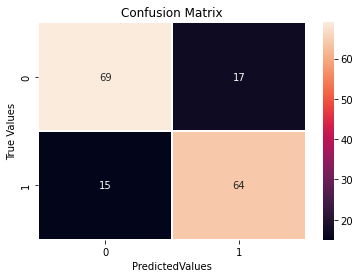

In [44]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

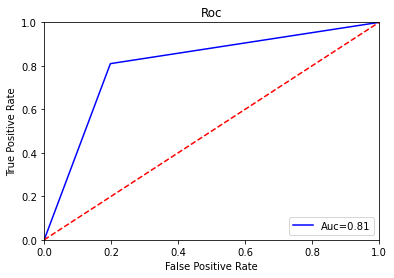

In [45]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

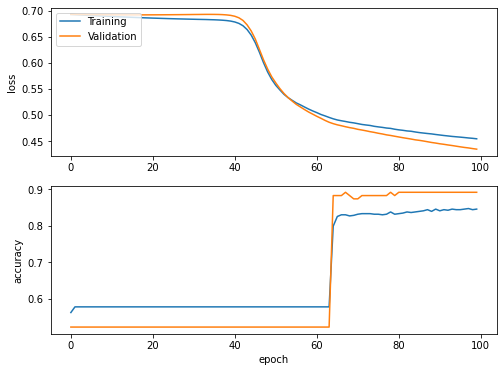

In [47]:
## DENEME2
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=7


history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred = np.argmax(y_pred, axis=1)

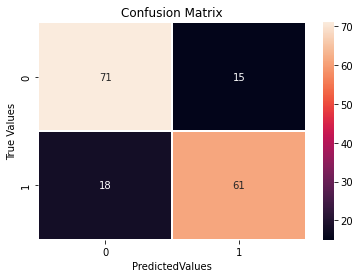

In [50]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

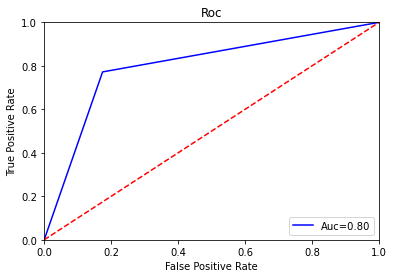

In [51]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

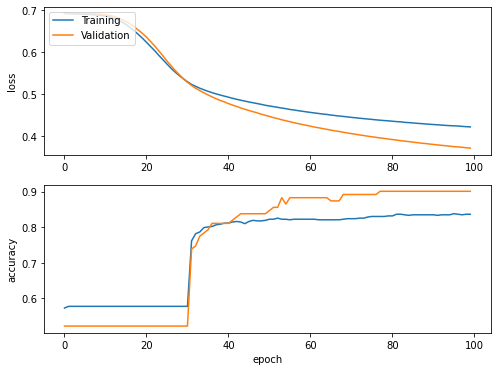

In [53]:
## DENEME3
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=3

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [54]:
y_pred = model.predict(X_test)

In [55]:
y_pred = np.argmax(y_pred, axis=1)

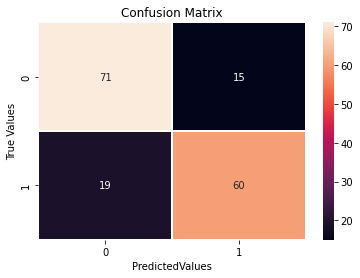

In [56]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

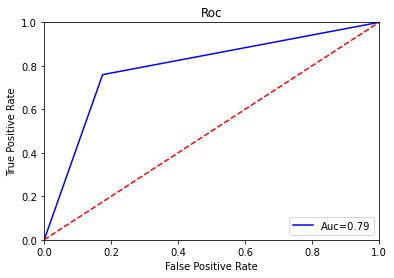

In [57]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()